<a href="https://colab.research.google.com/github/arunravi8595/CE888-Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Data-1
#To find ethnicity distribution in Stop & Search by Police
#Data downloaded from https://data.police.uk/data/
Police_search = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE888/main/Assignment/2020-12-essex-stop-and-search.csv') 


In [3]:
Police_search.shape

(422, 15)

In [4]:
#Check NaN in data
Police_search.isnull().sum()

Type                                          0
Date                                          0
Part of a policing operation                  0
Policing operation                          422
Latitude                                      4
Longitude                                     4
Gender                                       37
Age range                                    45
Self-defined ethnicity                       37
Officer-defined ethnicity                    48
Legislation                                   0
Object of search                              0
Outcome                                       3
Outcome linked to object of search            0
Removal of more than just outer clothing     37
dtype: int64

In [5]:
# Drop columns with NaN values
Police_search = Police_search[Police_search["Outcome"].notna()]

In [6]:
Police_search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2020-12-01T00:01:00+00:00,False,NaN,51.881413,0.215455,Female,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,A no further action disposal,False,False
1,Person search,2020-12-01T00:01:00+00:00,False,NaN,51.636110,0.062590,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
2,Person search,2020-12-01T00:01:00+00:00,False,NaN,51.636546,0.063333,Male,18-24,Black/African/Caribbean/Black British - Caribbean,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
3,Person search,2020-12-01T01:01:00+00:00,False,NaN,51.629479,0.439730,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
4,Vehicle search,2020-12-01T01:01:00+00:00,False,NaN,51.629479,0.439730,NaN,NaN,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,NaN


In [7]:
Police_search["Officer-defined ethnicity"].value_counts()

White    302
Black     46
Asian     12
Other     12
Name: Officer-defined ethnicity, dtype: int64

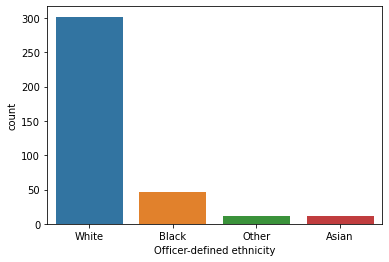

In [8]:
#Plot ethnicity distribution
sns.countplot(x="Officer-defined ethnicity", data = Police_search)

In [9]:
#Load Data-2
#To find ethnicity distribution in Census
#Data downloaded from https://data.essex.gov.uk/dataset/2j1wl/essex-and-district-ethnicity-population-2011-census
Census_data = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE888/main/Assignment/Essex_Ethnicity_Census.csv')

In [10]:
Census_data.shape

(15, 27)

In [11]:
#Check NaN in data
Census_data.isnull().sum()

District                                                   0
All categories: Ethnic group                               0
White: British                                             0
White: Irish                                               0
White: Gypsy or Irish Traveller                            0
White: Other White                                         0
Mixed/multiple ethnic group: White and Black Caribbean     0
Mixed/multiple ethnic group: White and Black African       0
Mixed/multiple ethnic group: White and Asian               0
Mixed/multiple ethnic group: Other Mixed                   0
Mixed/Multiple Ethnic Group (Total)                        0
Asian/Asian British: Indian                                0
Asian/Asian British: Pakistani                             0
Asian/Asian British: Bangladeshi                           0
Asian/Asian British: Chinese                               0
Asian/Asian British: Other Asian                           0
Asian/Asian British (Tot

In [12]:
Census_data.head()

,District,All categories: Ethnic group,White: British,White: Irish,White: Gypsy or Irish Traveller,White: Other White,Mixed/multiple ethnic group: White and Black Caribbean,Mixed/multiple ethnic group: White and Black African,Mixed/multiple ethnic group: White and Asian,Mixed/multiple ethnic group: Other Mixed,Mixed/Multiple Ethnic Group (Total),Asian/Asian British: Indian,Asian/Asian British: Pakistani,Asian/Asian British: Bangladeshi,Asian/Asian British: Chinese,Asian/Asian British: Other Asian,Asian/Asian British (Total),Black/African/Caribbean/Black British: African,Black/African/Caribbean/Black British: Caribbean,Black/African/Caribbean/Black British: Other Black,Black/Black British (Total),Other ethnic group: Arab,Other ethnic group: Any other ethnic group,Other Ethnic Groups (Total),Unnamed: 24,BAME,BAME %
0,Essex,1393587,1264877,11165,2161,35653,6936,2801,6173,4975,20885,12456,3462,2747,6361,9834,34860,12143,4556,2010,18709,2042,3235,5277,NaN,79731,5.72%
1,Basildon,174497,156215,1313,873,3276,1131,461,668,627,2887,2089,436,322,584,1335,4766,3339,931,415,4685,112,370,482,NaN,12820,7.35%
2,Braintree,147084,137010,1051,132,3894,554,221,596,466,1837,625,122,190,335,726,1998,540,286,87,913,65,184,249,NaN,4997,3.40%
3,Brentwood,73601,65688,921,121,2138,343,138,444,271,1196,939,113,172,377,749,2350,542,230,124,896,105,186,291,NaN,4733,6.43%
4,Castle Point,88011,83943,527,17,786,346,104,264,197,911,378,67,87,220,260,1012,327,203,131,661,31,123,154,NaN,2738,3.11%


In [13]:
#Transpose column into row
Census_data = Census_data.T
Census_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
District,Essex,Basildon,Braintree,Brentwood,Castle Point,Chelmsford,Colchester,Epping Forest,Harlow,Maldon,Rochford,Tendring,Uttlesford,Southend-on-Sea UA,Thurrock UA
All categories: Ethnic group,1393587,174497,147084,73601,88011,168310,173074,124659,81944,61629,83287,138048,79443,173658,157705
White: British,1264877,156215,137010,65688,83943,151990,151453,106233,68715,59011,79628,131666,73325,151136,127587
White: Irish,11165,1313,1051,921,527,1450,1155,1427,875,358,468,998,622,1496,1108
White: Gypsy or Irish Traveller,2161,873,132,121,17,212,79,176,117,201,49,62,122,162,308


In [14]:
#Combine similar ethnic groups together
#Make ethnic classifications to match Data1 - Police search

In [15]:
#Load Data-3
#To find ethnic distribution across the Police workforce
#Data downloaded from https://www.ethnicity-facts-figures.service.gov.uk/workforce-and-business/workforce-diversity/police-workforce/latest#by-ethnicity-police-officers
Workforce_data=pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE888/main/Assignment/by-ethnicity-police-officers-table.csv')

In [16]:
Workforce_data.head()

,Ethnicity,% of police officers,% of population,Number of police officers (FTE)
0,Asian,3.1,6.8,"3,884"
1,Black,1.3,3.3,"1,586"
2,Mixed,2.2,2.2,"2,711"
3,White,92.7,86.0,"116,536"
4,Other inc Chinese,0.8,1.7,993


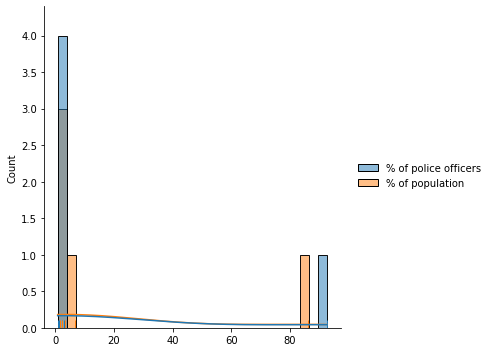

In [19]:
sns.displot(Workforce_data, bins=30, kde=True, rug=True)

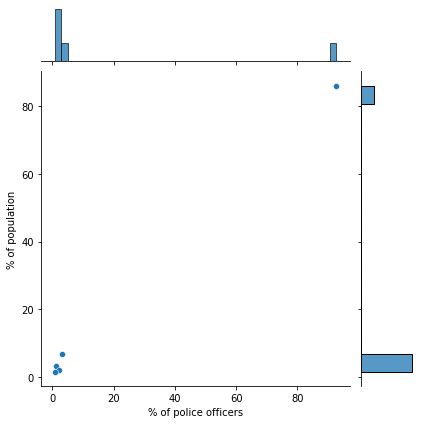

In [20]:
sns.jointplot(x='% of police officers', y='% of population', data=Workforce_data)

In [ ]:
#Compare Dataset 2 and 3 (Ethnicity in workforce and Census)
#Result of this Data will be either a match or difference between them
#If there is no percentage difference then the employment is distributed to all ethnicity equally
#If there is a difference between them, then compare the result with Data 1 (Police search) to find if the predominant ethnicity has any influence